# библиотека NumPy

автор: Дьяконов Александр www.dyakonov.org/ag/

для поддержки курсов автора, в частности https://github.com/Dyakonov/IML

In [1]:
import numpy as np

In [2]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
plt.style.use('seaborn-dark')
plt.rc('font', size=14)

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

Populating the interactive namespace from numpy and matplotlib


In [3]:
plt.rc('font', size=14)

In [4]:
import numpy as np
np.__version__

'1.15.1'

## Создание вектора

In [7]:
a = np.array([0, 1, 2, 3], dtype='float')
b = np.array(range(4))
c = np.arange(4)

a, b, c

(array([0., 1., 2., 3.]), array([0, 1, 2, 3]), array([0, 1, 2, 3]))

In [8]:
%timeit z = [x  ** 2 for x in range(1000)]

206 µs ± 1.98 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%timeit z = np.arange(1000) ** 2

2.97 µs ± 31.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## создание разные векторов

In [65]:
print (np.full(5, 3.14)) # заполнить одним элементом
print (np.arange(1, 10, 3))
print (np.linspace(0, 1, 5))
print (np.ones(3))
print (np.ones(3, dtype=int))
print (np.ones((2, 2)))
print (np.zeros(3))
print (np.empty(4))
np.random.seed(10) 
print (np.random.rand(4))
print (np.random.randn(4))
print (np.random.randint(0, 5, 10))
print (np.tile([1, 2], 3))
print (np.empty(3)) # просто массив из 3х элементов
np.random.choice([2, 3, 4], 5, replace=True)

[3.14 3.14 3.14 3.14 3.14]
[1 4 7]
[0.   0.25 0.5  0.75 1.  ]
[1. 1. 1.]
[1 1 1]
[[1. 1.]
 [1. 1.]]
[0. 0. 0.]
[1. 1. 1. 1.]
[0.77132064 0.02075195 0.63364823 0.74880388]
[-1.54540029 -0.00838385  0.62133597 -0.72008556]
[0 2 0 4 3 0 4 3 0 3]
[1 2 1 2 1 2]
[0. 0. 0.]


array([4, 4, 3, 2, 2])

In [137]:
np.choose([0,1,0,1,1], [[1,1,1,1,1], [2,2,2,2,2]])

array([1, 2, 1, 2, 2])

## Динамическая типизация

In [24]:
x = np.array([1, 2])
print (x.dtype)
x = x + 0.0 # x += 0.0 конкретно здесь не сработает
print (x.dtype)
x = x + 2j
print (x.dtype)
x = x > 0
print (x.dtype)

int64
float64
complex128
bool


In [85]:
x = np.array([-0.6, 0.4, 1.4, 1.5, 1.6])
print (np.round(x))
print (x.astype(int))
print (np.round(x))
print (np.round(x).astype(int))

[-1.  0.  1.  2.  2.]
[0 0 1 1 1]
[-1.  0.  1.  2.  2.]
[-1  0  1  2  2]


## сравнения

In [67]:
x = np.array([1, 3, 2])
y = np.array([2, 1, 2])

print (x > y)
print (x == y)
print (np.array_equal(x, y))
print (np.array_equal(x, x))

[False  True False]
[False False  True]
False
True


# создание матрицы

In [44]:
b = np.array([[0, 1, 2], [3, 4, 5]])

pd.DataFrame(b)

,0,1,2
0,0,1,2
1,3,4,5


In [45]:
a = np.arange(6).reshape(2, 3)
pd.DataFrame(a)

,0,1,2
0,0,1,2
1,3,4,5


In [14]:
# матрицы

print (np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [17]:
# многомерные матрицы

x = np.random.randint(10, size=(3, 4, 5))

print("ndim: ", x.ndim)
print("shape:", x.shape)
print("size: ", x.size)
print("dtype:", x.dtype)
print("itemsize:", x.itemsize, "bytes")
print("nbytes:", x.nbytes, "bytes")

ndim:  3
shape: (3, 4, 5)
size:  60
dtype: int64
itemsize: 8 bytes
nbytes: 480 bytes


In [192]:
print (np.triu(np.ones((5,5))))
print (np.tril(np.ones((5,5)), k=-2))
print (np.triu(np.ones((5,5)).T, k=1))


[[ 1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.]
 [ 0.  0.  1.  1.  1.]
 [ 0.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  1.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.]]
[[ 0.  1.  1.  1.  1.]
 [ 0.  0.  1.  1.  1.]
 [ 0.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.]]


# присваивание, индексирование

индексация как в списках

In [15]:
x = np.arange(5, dtype='int')
x[1] = 3.14 # округление
x

array([0, 3, 2, 3, 4])

In [21]:
x = np.arange(5, dtype='int')
x[2:] = 10
x[-1] = -1
x

array([ 0,  1, 10, 10, -1])

In [22]:
# опасность - не происходит копирования
x = np.zeros((3,3))
x2 = x[1:, 1:] # надо .copy()
x2[0, 0] = 1
x

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [17]:
# опасность - не происходит копирования
x = np.ones(3)
x2 = x[1:]
x2[0] = 0
x

array([1., 0., 1.])

In [19]:
np.may_share_memory(x, y)

True

In [18]:
x = np.arange(10)
y = x[::2]
y[0] = 100
x, np.may_share_memory(x, y)

(array([100,   1,   2,   3,   4,   5,   6,   7,   8,   9]), True)

In [108]:
x = np.arange(10)
i = [2, 5, 6]
x[i]

array([2, 5, 6])

## Поэлементные операции

In [46]:
x = np.array([1, 2, 3])
y = np.array([2, 1, 0])

print (x + y)
print (x - y)
print (x * y)
print (x / y)
print (x ** y)

print (np.sin(x))
print (np.exp(x))
print (np.log(x).round(2))

[3 3 3]
[-1  1  3]
[2 2 0]
[0.5 2.  inf]
[1 2 1]
[0.84147098 0.90929743 0.14112001]
[ 2.71828183  7.3890561  20.08553692]
[0.   0.69 1.1 ]


In [50]:
print (x + 1)
print (2 ** x)
#print (x + np.array([1, 2])) ошибка

[2 3 4]
[2 4 8]


## графики

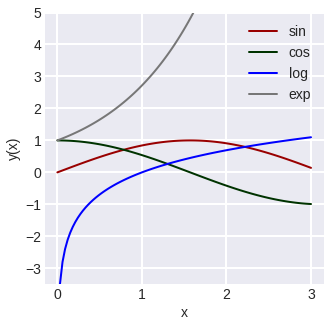

In [23]:
x = np.linspace(0, 3, 100)

plt.figure(figsize=(5, 5))

plt.plot(x, np.sin(x), lw=2, c='#990000', label='sin')
plt.plot(x, np.cos(x), lw=2, c='#003300', label='cos')
plt.plot(x, np.log(x), lw=2, c='#0000FF', label='log')
plt.plot(x, np.exp(x), lw=2, c='#777777', label='exp')

plt.ylim([-3.5, 5])
plt.grid(lw=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

# изменение формы

In [26]:
x = np.zeros(12)
x.reshape(2, 6)

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [27]:
x.reshape(4, -1)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [88]:
x = np.arange(3)

y = np.arange(3)[:, np.newaxis]

z = np.arange(3)[np.newaxis,:]

print (x.shape, y.shape, z.shape)


(3,) (3, 1) (1, 3)


In [91]:
x + x, x + y, x + z

(array([0, 2, 4]), array([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4]]), array([[0, 2, 4]]))

# конкатенирование

In [30]:
x = np.array([[1,2], [3,4]])
np.concatenate([x, x+1])

array([[1, 2],
       [3, 4],
       [2, 3],
       [4, 5]])

In [32]:
np.concatenate([x, x+1], axis=1)

array([[1, 2, 2, 3],
       [3, 4, 4, 5]])

In [33]:
np.vstack([x, x + 1])

array([[1, 2],
       [3, 4],
       [2, 3],
       [4, 5]])

In [34]:
np.hstack([x, x + 1])

array([[1, 2, 2, 3],
       [3, 4, 4, 5]])

# расщепить матрицу

есть ещё split, vsplit

In [41]:
x = np.arange(10).reshape(2, 5)
a, b, c = np.hsplit(x, [1, 4]) # есть split, vsplit
print (a)
print (b)
print (c)

[[0]
 [5]]
[[1 2 3]
 [6 7 8]]
[[4]
 [9]]


## Диагонализация

два вида

In [42]:
x = np.diag([1, 3, 2])

x, np.diag(x)

(array([[1, 0, 0],
        [0, 3, 0],
        [0, 0, 2]]), array([1, 3, 2]))

# действия над матрицами

In [88]:
x = np.array([[1, 2], [3, 4]])

In [46]:
x + 1

array([[2, 3],
       [4, 5]])

In [47]:
x ** 2

array([[ 1,  4],
       [ 9, 16]])

In [89]:
2 ** x

array([[ 2,  4],
       [ 8, 16]])

In [48]:
x * x # поэлементно

array([[ 1,  4],
       [ 9, 16]])

In [49]:
np.dot(x, x)

array([[ 7, 10],
       [15, 22]])

In [50]:
x / x

array([[1., 1.],
       [1., 1.]])

In [51]:
np.abs(x - 2)

array([[1, 0],
       [1, 2]])

In [57]:
np.multiply.outer([1, 2], [0, 2, 4])

array([[0, 2, 4],
       [0, 4, 8]])

In [84]:
# Broadcasting
print (np.ones((3, 3)) + np.arange(3))
print (np.ones((3, 3)) + np.arange(3)[:, np.newaxis])

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]
[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


## Кумулятивные операции

In [51]:
x = np.array([2, 1, 2, 0, 0, 4])

In [53]:
x.sum(), np.sum(x)

(9, 9)

In [54]:
x.prod(), np.prod(x)

(0, 0)

In [57]:
x = np.array([2, 1, 2, np.nan, np.nan, 4])
np.nansum(x)

9.0

In [58]:
np.nanprod(x)

16.0

In [65]:
x = np.arange(12).reshape(3, 4)
print (x)
print (np.sum(x))
print (np.sum(x, axis=0))
print (np.sum(x, axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
66
[12 15 18 21]
[ 6 22 38]


In [72]:
x = np.arange(12).reshape(3, 4)
print (x)
print (np.max(x))
print (np.max(x, axis=0))
print (np.max(x, axis=1))
print (np.maximum(x, 5))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
11
[ 8  9 10 11]
[ 3  7 11]
[[ 5  5  5  5]
 [ 5  5  6  7]
 [ 8  9 10 11]]


In [75]:
print (np.argmax(x))
print (np.argmax(x, axis=0))

11
[2 2 2 2]


In [80]:
# обработка не-чисел (пропущенных значений)
x = [1, 3, np.nan]
print(np.mean(x))
print(np.nanmean(x))

nan
2.0


## сортировки

In [147]:
x = np.random.randint(0, 6, 10)
print (x)
print (np.sort(x))
print (np.argsort(x))
print (np.partition(x, 3)) # <3 слева, >3 справа

[0 1 3 1 3 5 3 5 2 2]
[0 1 1 2 2 3 3 3 5 5]
[0 1 3 8 9 2 4 6 5 7]
[0 1 1 2 2 5 3 5 3 3]


In [94]:
x = [2, 2, 1, 2, 5]
u, i = np.unique(x, return_counts=True)
print(u, i)

[1 2 5] [1 3 1]


In [93]:
x = np.ones((3, 3))
x[0] = 0
x

array([[0., 0., 0.],
       [1., 1., 1.],
       [1., 1., 1.]])

# Сравнения, маски (логические матрицы)

In [90]:
x = np.array([[1, 2], [3 ,4]])
y = np.array([[2, 2], [3 ,3]])
print (x > y)
print (x == y)
print (np.array_equal(x, y))

[[False False]
 [False  True]]
[[False  True]
 [ True False]]
False


In [91]:
x = np.array([0.1, 0.5, 0.2, 0.6])
x[x<0.3] = 0.3
print (x)

np.maximum(x, 0.3)

[0.3 0.5 0.3 0.6]


array([0.3, 0.5, 0.3, 0.6])

In [106]:
x = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
y = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
print (x | y)
print (x & y)

[ True  True  True False  True  True]
[ True False  True False  True False]


In [102]:
# np.random.seed(2)

x = np.random.randint(0, 5, 6)
y = np.random.randint(0, 5, 6)
print (x)
print (y)
print (x[y > 3])
print (y > 3)
xi = x > 3
yi = y > 3
print (xi)
print (yi)
print (xi | yi)
print (xi & yi)
print (~xi)
print (xi.any())
print (xi.all())

#print (xi.argmax())
#print (xi.argmin())
#print (xi.()) # argpartition argsort
yi.nonzero(), xi

[2 1 2 4 3 0]
[4 3 1 2 0 4]
[2 0]
[ True False False False False  True]
[False False False  True False False]
[ True False False False False  True]
[ True False False  True False  True]
[False False False False False False]
[ True  True  True False  True  True]
True
False


((array([0, 5]),), array([False, False, False,  True, False, False]))

array([1, 1, 2])

In [105]:
print (np.any(np.array([1, 2, 3, 4, 5]) > 3)) # какой-нибудь
print (np.all(np.array([1, 2, 3, 4, 5]) > 3)) # все

True
False


## Индексация

In [60]:
x = np.arange(10)
print (x[0], x[:2], x[-2:], x[::-2], x[1:8:3])

x = np.arange(10)
x[1:8:3] = -1
print (x)

0 [0 1] [8 9] [9 7 5 3 1] [1 4 7]
[ 0 -1  2  3 -1  5  6 -1  8  9]


In [61]:
x = np.arange(12).reshape(3, 4)
print(x, x[2,3], x[:,0], x[1,:], x[-2:,-2:], x[::2, ::2])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 11 [0 4 8] [4 5 6 7] [[ 6  7]
 [10 11]] [[ 0  2]
 [ 8 10]]


In [62]:
x = np.arange(6).reshape(2, 3)
x.T.ravel()

array([0, 3, 1, 4, 2, 5])

## max и min

In [63]:
x = np.array([0.1, 0.5, 0.2, 0.6])
y = np.array([0.2, 0.4, 0.3, 0.1])
print (x.min(), x.max())
print (np.min(x), np.max(x))
print (np.minimum(x, y))
print (np.maximum(x, y))
print (np.argmax(x))

0.1 0.6
0.1 0.6
[0.1 0.4 0.2 0.1]
[0.2 0.5 0.3 0.6]
3


In [142]:
x = np.array([[1, 4], [3, 5]])

print (x.min())

print (x.min(axis=0))

print (x.min(axis=1))

print (x.min(axis=0, keepdims=True))

print (x.min(axis=1, keepdims=True))

1
[1 4]
[1 3]
[[1 4]]
[[1]
 [3]]

1
[1 4]
[1 3]
[[1 4]]
[[1]
 [3]]


## многомерные матрицы

In [82]:
a = np.arange(4*3*2).reshape(4, 3, 2)
print (a.shape)

a.reshape(6, -1)

(4, 3, 2)


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

# Эффективное программирование

1) векторизация (Vectorizing for loops

In [138]:
x = np.zeros(1000000)

In [139]:
%%time
for i in range(1000000):
    x[i] += 1

CPU times: user 336 ms, sys: 32 ms, total: 368 ms
Wall time: 376 ms


In [140]:
%%time
x += 1

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 11.5 ms


In [142]:
def f(x):
    if x > 0.5:
        x += 1
    else:
        x -= 1
    return (x)

f_v = np.vectorize(f)

In [143]:
%%time
x = f_v(x)

CPU times: user 188 ms, sys: 16 ms, total: 204 ms
Wall time: 204 ms


3) встроенные опрерации

In [134]:
a = np.zeros(1000000)

%timeit global a; a = 0*a

%timeit global a; a *= 0

1.75 ms ± 178 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
242 µs ± 112 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


5) обращение к близким объектам быстрее (кэширование)

In [136]:
A = np.zeros((4000, 4000))

%timeit A.sum(axis=1)

%timeit A.sum(axis=0)

5.52 ms ± 67.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.45 ms ± 43.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# ScyPy

Подгонка кривой

[3.40758588 1.20089344 1.7707352 ]


Text(0,0.5,'f')

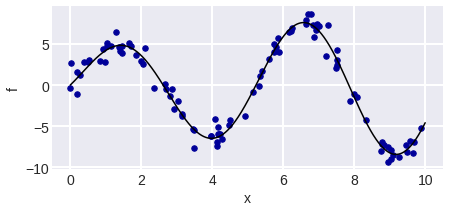

In [101]:
from scipy import optimize

xx = np.linspace(0, 10, num=1001)
np.random.seed(1)
x = 10 * np.random.rand(100)
y = 3.5 * np.sin(1.2 * x) * np.log1p(1.3 + x) + np.random.normal(size=100)

def f(x, a, b, c):
    return a * np.sin(b * x) * np.log1p(c + x)

params, params_covariance = optimize.curve_fit(f, x, y, p0=[1, 1, 1])
print(params)

plt.figure(figsize=(7, 3))
plt.scatter(x, y, 30, c='#000099')
plt.plot(xx, f(xx, *params), c='black')
plt.grid(lw=2)
plt.xlabel('x')
plt.ylabel('f')

Минимизация и корни

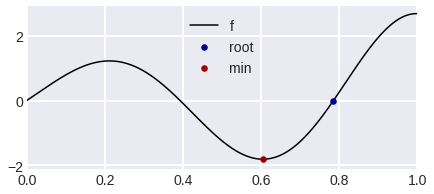

In [117]:
from scipy import optimize

def f(x):
    return (np.sin(8 * x) * np.exp(x))

x = np.linspace(0, 1, 1001)
y = f(x)

root = optimize.root(f, x0=0.8)
minf = optimize.minimize(f, x0=0.8, bounds=((0.2, 1), ))

plt.figure(figsize=(7, 3))
plt.plot(x, y, c='black', label='f', zorder=1)
plt.scatter([root.x], [f(root.x)], 30, label='root', zorder=2, color='#000099')
plt.scatter([minf.x], [f(minf.x)], 30, label='min', zorder=2, color='#990000')
plt.legend()
plt.xlim([0, 1])
plt.grid(lw=2)

# Модель случайных блужданий

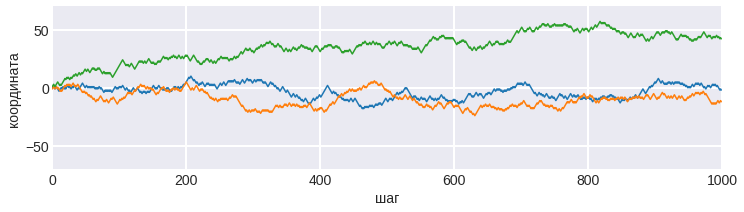

In [79]:
def random_walk(n=1000, p=0.5):
    x = 2*(np.random.rand(n) < p) - 1
    return (x.cumsum())

plt.figure(figsize=(12, 3))
plt.plot(random_walk())
plt.plot(random_walk())
plt.plot(random_walk())
plt.xlim([0, 1000])
plt.ylim([-70, 70])
plt.xlabel('шаг')
plt.ylabel('координата')
plt.grid(lw=2)

# Графика

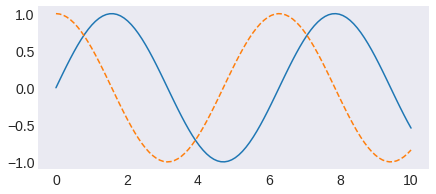

In [5]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure(figsize=(7, 3))
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');
plt.show() # если в юпитере один график, то можно не писать


fig.savefig('my_figure.png') # сохранение

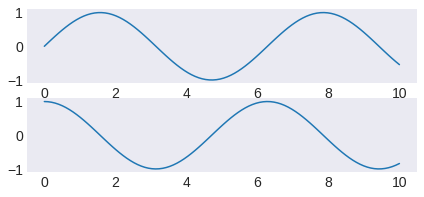

In [6]:
# несколько графиков - первый способ

plt.figure(figsize=(7, 3))  # create a plot figure

plt.subplot(2, 1, 1) # (строк, столбцов, текущий)
plt.plot(x, np.sin(x))

plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

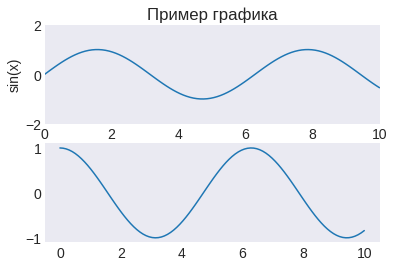

In [7]:
# второй способ

fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

ax[0].set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='Пример графика');

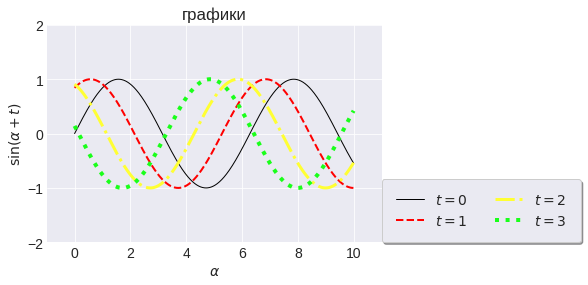

In [9]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x), c='black', linestyle='-', lw=1, label='$t=0$');
ax.plot(x, np.sin(x+1), c='r', linestyle='--', lw=2, label='$t=1$');
ax.plot(x, np.sin(x+2), c='#FFFF33', linestyle='-.', lw=3, label='$t=2$');
ax.plot(x, np.sin(x+3), c=(0.1, 1.0, 0.1), linestyle=':', lw=4, label='$t=3$');

plt.xlim([-1, 11])
plt.ylim([-2, 2])

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\sin(\alpha + t)$');
plt.title('графики');
plt.legend(loc=(1, 0), frameon=True, ncol=2,
           fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.grid()

# диаграмма рассеивания

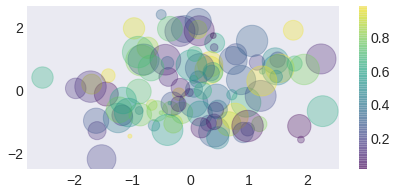

In [11]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.figure(figsize=(7, 3))
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar(); 

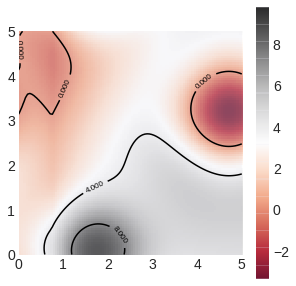

In [13]:
# линии уровня функции

def f(x, y):
    z = (np.sin(x) + np.cos(y)) ** 3 + np.abs(np.cos(x) - x) + (np.sin(y))
    return z

x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(5, 5))
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.7)
plt.colorbar();

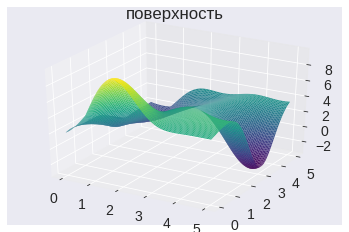

In [21]:
from mpl_toolkits import mplot3d # import mpld3
# mpld3.enable_notebook()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('поверхность');

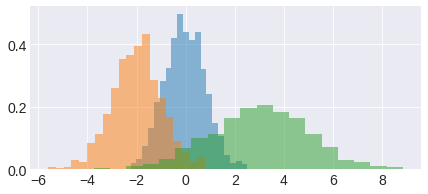

In [16]:
# Плотность распределения

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(bins=20, histtype='stepfilled', alpha=0.5, normed=True)

plt.figure(figsize=(7, 3))
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);
plt.grid()

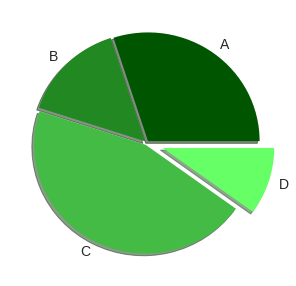

In [25]:
# пирог

fracs = [30, 15, 45, 10]
colors = ['#005500', '#228822', '#44BB44', '#66FF66']

fig, ax = plt.subplots(figsize=(5, 5))  
pie = ax.pie(fracs, colors=colors, explode=(0.02, 0.02, 0.02, 0.15), shadow=True,
             labels=['A', 'B', 'C', 'D'])

(0, 10)

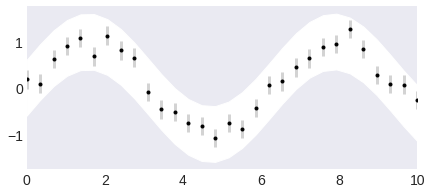

In [35]:
# заливка и ошибки
x = np.linspace(0, 10, 30)
dy = 0.2
y = np.random.normal(np.sin(x), dy)
y1 = np.sin(x) + 3*dy
y2 = np.sin(x) - 3*dy

plt.figure(figsize=(7, 3))
# fig, ax = plt.subplots()
plt.fill_between(x, y1, y2, color='white')
plt.errorbar(x, y, dy, fmt='.k', ecolor='lightgray', elinewidth=3)
plt.xlim([0, 10])

# Ниже - необязательный материал

наброски

In [141]:
x  = np.arange(5)
print (x)
i = [1, 2, 1, 1, 2, 3]
x[i] += 1
print (x) # по одному разу прибавилась 1 !!!


[0 1 2 3 4]
[0 2 3 4 4]


In [142]:
# а надо так...
x  = np.arange(5)
i = [1, 2, 1, 1, 2, 3]
np.add.at(x, i, 1)
print (x)

# есть ещё reduceat()

[0 4 4 4 4]


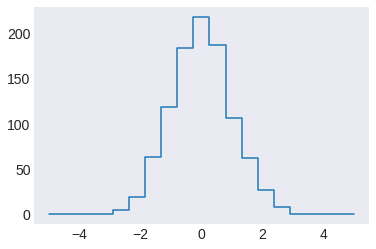

In [143]:
# ручное построение гистограммы


np.random.seed(42)
x = np.random.randn(1000)

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

# plot the results
plt.plot(bins, counts, linestyle='steps');

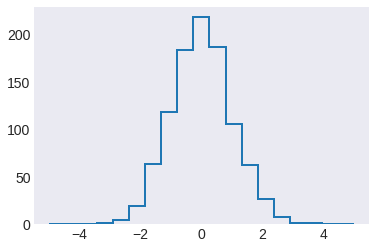

In [145]:
# встроенная гистограмма быстрее! Она ещё вычисляет вхождения!
plt.hist(x, bins, histtype='step', lw=2);

In [207]:
x = np.array([1, 5, 0, 2])

np.abs(x - x[:,np.newaxis])


array([[0, 4, 1, 1],
       [4, 0, 5, 3],
       [1, 5, 0, 2],
       [1, 3, 2, 0]])

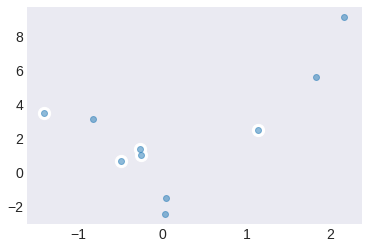

In [138]:
X = np.random.randn(10, 2)
X[:, 1] += 2 * X[:, 0] ** 2

i = np.random.choice(np.arange(10), 5, replace=False)


plt.scatter(X[i, 0], X[i, 1], facecolor='white', s=150) #, facecolor='none', s=0.1);
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)



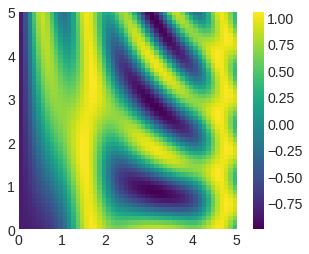

In [87]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

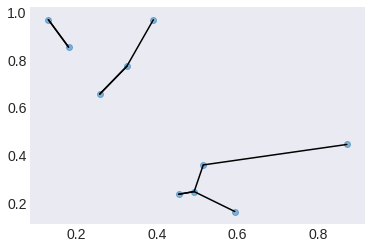

In [157]:
# ближайший сосед
X = rand(10, 2)
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
nearest = np.argsort(dist_sq, axis=1)

for i, j in zip(nearest[:, 0], nearest[:, 1]):
    plt.plot(X[[i, j], 0], X[[i, j], 1], c='black')
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)